In [1]:
# import relevant libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider
sns.set()

# Key Statistical Concepts

I intend to make an interactive visualizer for better understanding of key statistics concepts. We are going to briefly discuss and visualize the following concepts. Feel free to play with them using the interactive slider.

1. <a href='#Probability Distribution'>Probability Distribution</a>
2. <a href='#Central Limit Theorem'>Central Limit Theorem</a>
3. <a href='#Hypothesis Testing'>Hypothesis Testing</a>
4. <a href='#Confidence Interval'>Confidence Interval</a>

## 1. Probability Distribution
<a id='Probability Distribution'></a>

A **random variable** is a variable that assigns a real number to each outcome in a sample space of a random experiment (e.g. rolling a dice). Hence, a random variable takes on values according to chance.

We typically separate random variables into two different classes:

* Discrete random variables - Finite or countable infinite number of outcomes
* Continuous random variables - Infinite number of outcomes (in a continuum)

When discussing random variables, we typically describe them in terms of **probability distributions**. That is, the probability of each value that can come out of the random variable.

Some examples of well known probability distributions (or simply distributions) are:

* Discrete random variables - Bernoull, Binomial, Geometric etc.
* Continuous random variables - Uniform, Normal, Student's t etc.

The distibution that is most talked about is the **Normal Distribution**.

### Normal Distribution

The Normal distribution is a very commonly occuring and important distribution in statistics. It is also known as Gaussian distribution and Bell Curve distribution (becuase of its bell like shape).

Normal distributions have the following features:

* Symmetric bell shape (**Skewness = 0**)
* Fully characterized by its mean ($\mu$) and variance ($\sigma^2$, where $\sigma$ is the standard deviation)
* Mean and median are equal; both located at the center of the distribution
* Around $68\%$ of all observations fall within one standard deviations around the mean ($\mu \pm \sigma$)
* Around $95\%$ of all observations fall within two standard deviations around the mean ($\mu \pm 2\sigma$)
* Around $99\%$ of all observations fall within three standard deviations aroud the mean ($\mu \pm 3\sigma$)

**Why is Normal distribution so important?**

Many important tests and methods in statistics, are based on the assumption of normality. A large part of this is due to the results of the <a href='#Central Limit Theorem'>Central Limit Theorem</a> (CLT), which states that the sampling distribution of sample mean tends to normal distribution as we increase the sample size of our independent samples.

The PDF of a normal random variable is:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

And is defined for $-\infty < x < \infty$. When we have $\mu = 0$ and $\sigma = 1$, we call this the standard normal distribution. A very common tool in statistics is a standard normal probability table, used for looking up the values of the standard normal CDF for given values of $x$.

We standardize a normal random variable $X$ by subtracting the mean ($\mu$) and dividing by the standard deviation ($\sigma$), resulting in the standard normal random variable $Z$ **~** $N(0, 1)$.

$$ Z = \frac{X - \mu}{\sigma} $$

Below, is the visualization of a normal distribution. You can vary the parameters mean ($\mu$) and variance ($\sigma^2$) using the interactive slider and observe how the shape changes.

In [2]:
def plotter_norm(mu, sigma):    # plotting function to pass to interactive slider 
    
    # define range of x values and normal pdf
    x = np.linspace(-10, 10, 500)                                                    # x values 
    y = (1/(sigma * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu)**2 / (2 * sigma**2))   # normal pdf

    # plotting commands to plot and shade the normal curve
    plt.figure(figsize = (15, 8))
    plt.plot(x, y, label = f'$N({mu}, {sigma**2})$')
    plt.fill_between(x, y, alpha = 0.3)
    plt.axvline(mu - sigma, color = 'red', linestyle = 'dashed', label = '$ \mu \pm \sigma$')
    plt.axvline(mu + sigma, color = 'red', linestyle = 'dashed')
    plt.axvline(mu - 2 * sigma, color = 'grey', linestyle = 'dashed', label = '$ \mu \pm 2\sigma$')
    plt.axvline(mu + 2 * sigma, color = 'grey', linestyle = 'dashed')
    plt.axvline(mu - 3 * sigma, color = 'green', linestyle = 'dashed', label = '$ \mu \pm 3\sigma$')
    plt.axvline(mu + 3 * sigma, color = 'green', linestyle = 'dashed')
    plt.xlim(-10, 10)
    plt.ylim(0, 0.6)
    plt.xlabel('Value')
    plt.ylabel('Normal PDF')
    plt.title('Normal distribution curve - $N(\mu, {\sigma^2})$')
    plt.legend(loc = 'best');
    
mu_slider = IntSlider(min = -5, max = 5, step = 1, description = '$ \mu $')           # slider for mean
sigma_slider = IntSlider(min = 1, max = 4, step = 1, description = '$ \sigma $')      # slider for stdev
interact(plotter_norm, mu = mu_slider, sigma = sigma_slider);

interactive(children=(IntSlider(value=0, description='$ \\mu $', max=5, min=-5), IntSlider(value=1, descriptio…

## 2. Central Limit Theorem (CLT)
<a id='Central Limit Theorem'></a>

Central limit theorem is one of the most fundamental and profound concept in statistics.

Central limit theorem is about many independent samples from the same distribution. The central limit theorem says that the sum or average of many independent copies of a random variable is approximately a normal random variable. The remarkable part of the theorem is that this holds true irrespective of the probability distribution of the random variable. The CLT goes on to give precise values for the mean and standard deviation of the normal variable.

Often in practice sample size $(n)$ does not have to be all that large. Values of $n > 30$ often suffice.

Suppose $X_1, X_2, . . . , X_n$ are independent random variables with the same underlying distribution. In this case, we say that the $X_i$ are independent and identically-distributed, or i.i.d. In particular, the $X_i$ all have the same mean $\mu$ and standard deviation $\sigma$.

$$ \overline X_n = {\frac{X_1 + X_2 + . . . + X_n}{n}} = {\frac{1}{n}} \sum_{i=1}^{n} X_i $$

Note that $\overline X_n$ is itself a random variable and therefore has a sampling distribution of its own. The central limit theorem tell us about the value and distribution of $\overline X_n$, respectively.

**Central Limit Theorem**: As $n$ grows, the distribution of $\overline X_n$ converges to the normal distribution $N(\mu,{\frac{\sigma^2}{n}})$. The parameter values of this normal distribution can be derived using the properties of expected value $(EV)$ and variance $(Var)$.

$$ \sigma_{\overline X_n} = {\frac{\sigma}{\sqrt{n}}}$$

This quantity is called the **standard error of the mean**. It is the standard deviation of the sampling distribution of the sample mean. As we increase the size of our samples, the distribution of sample means comes to resemble a normal distribution. Intuitively, this should make sense. Higher the sample size, more accurately we can estimate the population mean. Even the **Law of Large Numbers** states essentially the same thing $-$ as $n$ grows, the probability that $\overline X_n$ (sample mean) is close to $\mu$ (population mean) goes to $1$. Therefore, as $n$ increases, more number of samples will have sample mean closer to population mean - a property of normal distribution (majority of probability area being close to mean). As, we keep on increasing our sample size this variability of sample mean further decreases. Hence, we see the ${\frac{1}{\sqrt{n}}}$ factor in the formula of standard error of the mean (again, this can be derived using properties of Variance $(Var)$).

Below, we have chosen **Poisson** distribution as the underlying distribution to show Central Limit Theorem in action. You can vary the $\lambda$ parameter of Poisson distribution and the sample size $n$ using the interactive slider. Note that for a Poisson distribution $\mu = \sigma^2 = \lambda$

In [3]:
np.random.seed(10)

def plotter_clt(lambda_, sample_size):     # plotting function to pass to interactive slider 
        
    num_of_samples = 10000
    
    # store means of all 10000 samples (each having sample size = sample_size) in a NumPy array
    means = np.array([np.random.poisson(lambda_, size = sample_size).mean() for x in range(num_of_samples)])
    
    # plot these means as a histogram
    plt.figure(figsize = (15, 8))
    plt.hist(means, bins = 20, density = True, alpha = 0.7, label = 'Sample means') 

    # plot central limit theorem (normal curve) using the formula given in markdown cell above
    X = np.linspace(0, 2 * lambda_, 1000)        # x values
    plt.plot(X, sp.stats.norm.pdf(X, loc = lambda_, scale = np.sqrt(lambda_ / sample_size)), 'k--',
             label = 'Central Limit Theorem')    # normal curve
    plt.title(f'Central Limit Theorem in action for Poisson Distribution ($\lambda$ = {lambda_})')
    plt.legend();
    
lambda_slider = IntSlider(min = 5, max = 20, step = 5, description = '$\lambda$')   # slider for lambda
sample_size_slider = IntSlider(min = 5, max = 100, step = 5, description = '$n$')   # slider for sample size
interact(plotter_clt, lambda_ = lambda_slider, sample_size = sample_size_slider);        

interactive(children=(IntSlider(value=5, description='$\\lambda$', max=20, min=5, step=5), IntSlider(value=5, …

## 3. Hypothesis Testing
<a id='Hypothesis Testing'></a>

Statistical inference is the practice of making predictions about a large group based on smaller samples. It is traditionally broken into two segments, **estimation** and **hypothesis testing**. Estimation provides values for specific things that we may be interested in, such as mean or variance, with a provided <a href='#Confidence Interval'>confidence interval</a>. A confidence interval provides a region within which you can expect to find the true value of the parameter we estimated.

Hypothesis testing provides a different focus, detailing a framework for statistical testing of hypothesized values. By making an assertion of what a value should be, you create a testable hypothesis.

Examples of hypothesis testing are:
- Testing if an increase in a stock's price is significant or just random chance
- Testing if there is a significant difference in salaries between employees with and without advanced degrees

Significant or statistically significant means that the results we observed likely did not happen by chance alone. 

Hypothesis testing means testing an assumption regarding a population parameter. The methodology employed for hypothesis testing depends on the nature of the data used and the hypothesis we want to test. Hypothesis testing is used to assess the plausibility of a hypothesis (about a population parameter) by using sample data.

Here we will do a hypothesis test about the population mean, given - we have the sample data, the data came from a normal distribution and the population variance is known (in real world this is unlikely but we will take this simple case for our demonstration).

**Hypothesis testing for the population mean** (Assumptions - normal data generating process and variance is known)

In this hypothesis testing, we assume that the true mean is a known quantity. We then collect a sample and calculate the difference between the sample mean and the assumed true mean. If this difference is large compared to the standard error (i.e. the typical difference we might expect to arise from random chance), then we conclude that the true mean is unlikely to be the value that we had assumed.

1. Suppose that we want to check if the IQ of students in a university with $2,500$ students is higher than the national average. Let's assume that national IQ is distributed as $N(100, 10^2)$. Our **null hypothesis** (no difference, no effect) will be: $H_0: \mu = 100$. We will also choose a threshold of significance for our evidence. In order to decide that our null hypothesis is wrong, we must find evidence that would have less than a certain probability $\alpha$ of occurring due to random chance. In this case, we will choose $\alpha = 0.05$

2. Next we collect our sample data. Here we assume that we already the have sample mean of IQ for a given sample size. Large sample sizes can lead to a situation of **practical significance vs statistical significance**

3. Then we compare the difference between the sample mean and the assumed true mean to the standard error. This quantity is called a **z-score**

$$ z = \frac{\overline X - \mu}{\sigma / \sqrt{n}} $$

4. The z-score can be used with the standard normal distribution (since we assumed IQ distribution to be normal) to calculate the probability that the difference between the sample mean and the null hypothesis is due only to random chance. This probability is called a **p-value**

5. If our p-value is less than $\alpha$ then we can reject the null hypothesis in favor of **alternative hypothesis** $H_A: \mu > 100$; since we found evidence that was very unlikely to arise by random chance, it must be that our initial assumption about the value of the true mean was wrong

This is a very simplified picture of hypothesis testing, but the central idea can be a useful tool outside of the formal hypothesis testing framework.

In [4]:
np.random.seed(0)

def plotter_nhst(sample_mean, sample_size):    # plotting function to pass to interactive slider

    mu = 100                                   # population parameters
    sigma = 10
    
    z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))   # z-score calculation
    print(f'z-score: {z}')
    
    p = 1 - sp.stats.norm.cdf(z)               # p-value calculation
    print(f'p-value: {p}')
    
    if p < 0.05:                               # to reject or not to reject the null hypothesis
        print("Reject null hypothesis: μ = 100 in favor of alternative hypothesis: μ > 100")
    else:
        print("Do not reject null hypothesis: μ = 100")
    
    plt.figure(figsize = (15, 8))
    
    # without standardizing - plot the normal curve, sample mean and rejection region
    plt.subplot(211)
    se = sigma / np.sqrt(sample_size)                               # std error
    X = np.linspace(mu - 3*se, mu + 3*se, 1000)                     # x values range
    clt = sp.stats.norm.pdf(X, loc = mu, scale = se)                # normal pdf
    plt.plot(X, clt, 'k--', label = 'central limit theorem')        # plot normal curve
    plt.axvline(sample_mean, color = 'b', label = 'sample mean')    # plot sample mean
    plt.fill_between(X[X > mu + 1.96*se], 0, clt[X > mu + 1.96*se], color = 'r', label = 'rejection region')
    plt.legend()                                                    # plot rejection region

    # repeat the same process but standardize to standard normal distribution
    plt.subplot(212)                                            
    Xs = np.linspace(-3, 3, 1000)
    normal = sp.stats.norm.pdf(Xs)
    plt.plot(Xs, normal, 'k--', label = 'standard normal distribution')
    plt.axvline(z, color = 'b', label = '$z$-score')
    plt.fill_between(Xs[Xs > 1.96], 0, normal[Xs > 1.96], color = 'r', label = 'rejection region')
    plt.legend();
    
sample_mean_slider = IntSlider(min = 95, max = 110, step = 3, description = '$\overline x$') # mean slider
sample_size_slider = IntSlider(min = 20, max = 50, step = 5, description = '$n$')            # size slider
interact(plotter_nhst, sample_mean = sample_mean_slider, sample_size = sample_size_slider);        

interactive(children=(IntSlider(value=95, description='$\\overline x$', max=110, min=95, step=3), IntSlider(va…

## 4. Confidence Interval
<a id='Confidence Interval'></a>

Much of inferential statistics is about estimating population parameters using sample statistics. We use confidence intervals in an attempt to determine how accurately our sample statistic estimates the population parameter.

Examples of parameter estimation are:
- Estimating the average male height in USA
- Estimating the correlation coefficient between annual advertising budget and annual revenue of a company

The confidence level refers to the long-term success rate of the method, that is, how often this type of interval will capture the parameter of interest. A specific confidence interval is an interval statistc that gives a range of plausible values for the parameter of interest with an associated confidence level.

**Why do we want to supplement a point estimate with an interval statistic like confidence interval?**

Suppose we have a sample data from a know distibution but unknown parameter. We can calculate a point estimate (say) $ \overline x = 10.0 $ to estimate the unknown parameter. But on its own, this estimate carries no information about its accuracy and stability. By stability we mean that the estimate does not change significantly each time we take a new sample of same size and re-compute the estimate. For this reason, statisticians augment point estimates with confidence intervals to get a sense of accuracy and stability of the estimate.

A more stable estimate will have a smaller confidence interval (indicating lower variability / lower standard error) as compared to the confidence interval of a less stable estimate when the confidence level are kept same. Also, higher the confidence level, wider is the confidence interval (keeping all other things constant).

The procedure to calculate a confidence interval for a statistic depends on the statistic and the underlying distribution from which we are sampling. Here, we are going to limit our discussion to the confidence interval for a population mean from sample mean when the underlying is a normal distribution and the population standard deviation is known.

Following is the formula for $95\%$ $ z $ confidence interval range for the population mean $ (\mu) $ when underlying is a normal distribution and the population standard deviation $ (\sigma) $ is known - 

$$ \left[ \overline x - 1.96{\frac{\sigma}{\sqrt{n}}}, \overline x + 1.96{\frac{\sigma}{\sqrt{n}}} \right] $$

$1.96$ is the right critical value $ z_{\alpha/2} $ at confidence level $ 0.95 = 1 -  \alpha $

The confidence level of an interval relates to significance level of a NHST (Null Hypothesis Significance Testing). We often see significance level $ \alpha = 0.05 $ and confidence level $ 0.95 = 1 - \alpha $

**Note:** The confidence level is never a probability that the unknown parameter is in the confidence interval. It is the long term success rate i.e. if we make many of these intervals, $95\%$ of them would be containing our unknown parameter (when confidence level is $95\%$).

### Visualization

1. $95\%$ central mass bound for a standard normal distribution

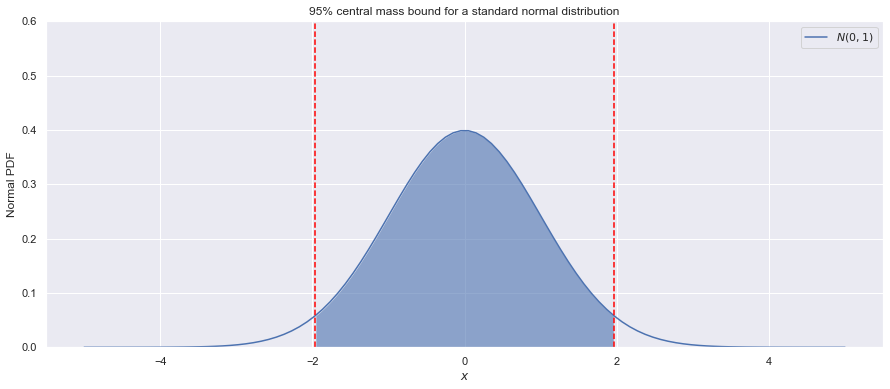

In [5]:
# set up the x axis
x = np.linspace(-5, 5, 100)
# normal distribution
y = sp.stats.norm.pdf(x, 0, 1)
plt.figure(figsize = (15, 6))
plt.plot(x, y, label = '$N(0, 1)$')
plt.legend()

# plot bounds
plt.axvline(-1.96, color = 'red', linestyle = 'dashed')
plt.axvline(1.96, color = 'red', linestyle = 'dashed')
plt.ylim(0, 0.6)

# shade the area
fill_x = np.linspace(-1.96, 1.96, 500)
fill_y = sp.stats.norm.pdf(fill_x, 0, 1)
plt.fill_between(fill_x, fill_y, alpha = 0.6)

plt.xlabel('$x$')
plt.ylabel('Normal PDF')
plt.title('95% central mass bound for a standard normal distribution');

2. Correct interpretation of confidence level

Please use the slider to adjust the confidence level of the intervals. The intervals that contain the parameter are in green where as the intervals that do not contain the parameter are in red.

In [6]:
def plotter_ci(confidence_level):           # plotting function to pass to interative slider
    
    np.random.seed(0)
    n = 100                                 # number of samples
    size = 100                              # sample size for each sample
    samples = [np.random.normal(loc = 0, scale = 1, size = size) for x in range(n)]  # store 100 samples data

    plt.figure(figsize = (13, 9))
    
    # plotting loop for to plot confidence interval of each sample
    for i in np.arange(1, n, 1):            # for each sample
        sample_mean = np.mean(samples[i])   # calculate sample mean
        se = 1 / np.sqrt(size)              # calculate standard error = population stdev / sqrt(sample size)
        margin = se * sp.stats.norm.ppf((1 + (confidence_level / 100)) / 2)    # calculate margin
        sample_ci = [sample_mean - margin, sample_mean + margin]      # lower and upper bound of interval
        if ((sample_ci[0] <= 0) and (0 <= sample_ci[1])):             # if population mean in interval
            plt.plot((sample_ci[0], sample_ci[1]), (i, i), color = 'green', linewidth = 1);
            plt.plot(np.mean(samples[i]), i, 'go');
        else:                                                         # if population mean not in interval
            plt.plot((sample_ci[0], sample_ci[1]), (i, i), color = 'red', linewidth = 1);
            plt.plot(np.mean(samples[i]), i, 'ro');
    plt.axvline(x = 0, linestyle = '--', label = 'Population Mean');  # population mean line
    plt.legend(loc = 'best')
    plt.title(f'{n} Confidence Intervals at {confidence_level}% Confidence Level for mean of 0');
    
confidence_level_slider = IntSlider(min = 5, max = 95, step = 10, description = 'C. Level (%)')
interact(plotter_ci, confidence_level = confidence_level_slider);

interactive(children=(IntSlider(value=5, description='C. Level (%)', max=95, min=5, step=10), Output()), _dom_…